In [67]:
from sklearn.datasets import load_digits

digits = load_digits()
import pandas as pd
import numpy as np

In [66]:
dataset= pd.read_csv('letter-recognition.csv')

In [68]:
dataset.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [42]:
dataset.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [44]:
X = dataset.iloc[:, 1:15]
y = dataset.iloc[:, 16]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2)

In [46]:
import math
math.sqrt(len(y_test))

63.245553203367585

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
predicted = knn.predict(X=X_test)
expected = y_test

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}')

First twenty predictions:
predicted[:20] = [ 5 10 11  5  8  7  6 11  6  8  5  6  5  8 10  8  8  8 10 11]
 expected[:20] = 19134     5
4981      9
16643    10
19117     6
5306      8
230       8
3148      7
11525    11
13672     8
1624      8
13415     8
18827     6
18550     5
5228      8
4623     10
3719      8
11640     9
2461      6
2051      9
15410    11
Name: yedgex, dtype: int64


In [38]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
#print(wrong)

Wrong predictions:


In [49]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 65.75%


In [27]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[   2    1    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    1    1    0    0    0    1    0    1    0    0    0    0    0
     0]
 [   0    1    5    8    4    2    0    2    0    0    0    0    0    0
     0]
 [   0    1    7   58   26    5    1    0    1    0    0    0    0    0
     0]
 [   0    0    2   18  100   47   11    9    1    1    3    0    0    0
     0]
 [   0    0    3   11   47  192   77   24    2    1    3    0    0    0
     0]
 [   0    0    2    9    9   79  404  184   12    4    1    0    1    0
     0]
 [   0    0    0    0    6   24  143 1354   56   12    2    0    0    0
     0]
 [   0    0    0    1    0    9   31  128  239   45    4    3    0    0
     0]
 [   1    0    0    0    3    4    9   32   85  172   29    0    0    0
     0]
 [   0    0    0    2    4    5    4   14   16   38   99    3    2    0
     0]
 [   0    1    1    0    0    1    1    4    1    6    5    4    1    0
     0]
 [   0    0    0    0 

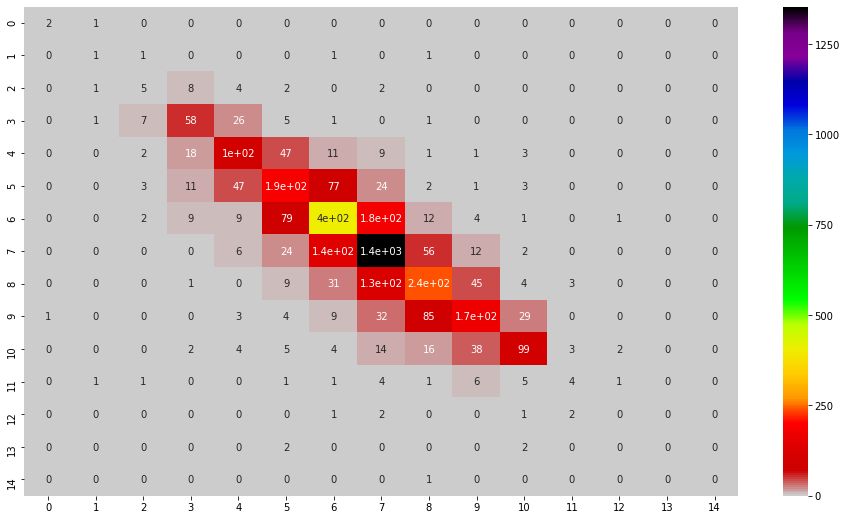

In [36]:
import pandas as pd
import seaborn as sns
plt.figure(figsize=(16, 9))

confusion_df = pd.DataFrame(confusion, index=range(15), columns=range(15))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [70]:
predicted = knn.predict(X=X_test)
expected = y_test

print('First forty predictions:')
print(f'predicted[:40] = {predicted[:40]}')
print(f' expected[:40] = {expected[:40]}')

First forty predictions:
predicted[:40] = [ 5 10 11  5  8  7  6 11  6  8  5  6  5  8 10  8  8  7 10 11  8  9 10 10
  8  8  8 11 10  8  5  8  7  9  8  7 11  8  8  6]
 expected[:40] = 19134     5
4981      9
16643    10
19117     6
5306      8
230       8
3148      7
11525    11
13672     8
1624      8
13415     8
18827     6
18550     5
5228      8
4623     10
3719      8
11640     9
2461      6
2051      9
15410    11
13290     8
6518     10
768       8
19197    11
16663     8
17114     8
4144      8
18896    11
16559    10
7025     10
12941     5
5739      9
15512     9
13294    10
3907      8
14759     7
17037    10
5948      8
18945     9
15492     7
Name: yedgex, dtype: int64


In [52]:
print(accuracy_score(y_true=expected, y_pred=predicted))

0.6575


In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X=X_train, y=y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [63]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 65.83%


In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X=X_train, y=y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [65]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 64.48%


In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X=X_train, y=y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [72]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 64.18%
